In [1]:
import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC/'
pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))
pnctopdir = '/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/PNC/'

rest = []
nback = []
emoid = []
rest1 = []
nback1 = []
emoid1 = []
age = []
sex = []
race = []

for sub,a in pncdemo['age_at_cnb'].items():
    try:
        s = pncdemo['Sex'][sub]
        r = pncdemo['Race'][sub]
        if r not in ['AA', 'EA']:
            continue
        s = s == 'M'
        r = r == 'AA'
        re = np.load(f'{pncdir}/fc/{sub}_task-rest_fc.npy')
        nb = np.load(f'{pncdir}/fc/{sub}_task-nback_fc.npy')
        em = np.load(f'{pncdir}/fc/{sub}_task-emoid_fc.npy')
        rest.append(re)
        nback.append(nb)
        emoid.append(em)
        rest1.append(np.load(f'{pnctopdir}/Top1/{sub}_task-resttop1_fc.npy'))
        nback1.append(np.load(f'{pnctopdir}/Top1/{sub}_task-nbacktop1_fc.npy'))
        emoid1.append(np.load(f'{pnctopdir}/Top1/{sub}_task-emoidtop1_fc.npy'))
        age.append(a)
        sex.append(s)
        race.append(r)
    except:
        pass

age = np.stack(age)
sex = np.stack(sex).astype('int')
race = np.stack(race).astype('int')
rest = np.stack(rest)
nback = np.stack(nback)
emoid = np.stack(emoid)
rest1 = np.stack(rest1)
nback1 = np.stack(nback1)
emoid1 = np.stack(emoid1)

print([x.shape for x in [age, sex, race, rest, nback, emoid, rest1, nback1, emoid1]])

[(1193,), (1193,), (1193,), (1193, 34716), (1193, 34716), (1193, 34716), (1193, 34716), (1193, 34716), (1193, 34716)]


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LogisticRegression

def rmse(yhat, y):
    return np.mean((yhat-y)**2)**0.5

losses = []

for _ in range(10):
    xtr1, xt1, xtr2, xt2, xtr3, xt3, xtr4, xt4, xtr5, xt5, xtr6, xt6, ytr, yt = train_test_split(rest, rest1, nback, nback1, emoid, emoid1, race, stratify=race, train_size=200)

    # reg1 = LogisticRegression(C=1, max_iter=500).fit(xtr1-xtr2, ytr)
    # yhat1 = reg1.predict(xt1-xt2)
    # reg2 = LogisticRegression(C=1, max_iter=500).fit(xtr3-xtr4, ytr)
    # yhat2 = reg2.predict(xt3-xt4)
    reg3 = LogisticRegression(C=1, max_iter=500).fit(xtr1, ytr)
    yhat3 = reg3.predict(xt1)
    # reg4 = LogisticRegression(C=1, max_iter=500).fit(xtr3, ytr)
    # yhat4 = reg4.predict(xt3)
    # reg5 = LogisticRegression(C=1, max_iter=500).fit(xtr5, ytr)
    # yhat5 = reg5.predict(xt5)
    # reg6 = LogisticRegression(C=1, max_iter=500).fit(xtr5-xtr6, ytr)
    # yhat6 = reg6.predict(xt5-xt6)
    yhat = np.round((yhat3)/1).astype('int')
    loss = np.mean(yhat == yt)
    null = np.mean(yt) # Not correct?
    if null < 0.5:
        null = 1-null
    print(loss, null)
    losses.append(loss)

print('Done')
print(np.mean(losses), np.std(losses))

0.770392749244713 0.5307150050352467
0.796576032225579 0.5307150050352467
0.7683786505538771 0.5307150050352467
0.7885196374622356 0.5307150050352467
0.7663645518630413 0.5307150050352467
0.7603222557905337 0.5307150050352467
0.7844914400805639 0.5307150050352467
0.7663645518630413 0.5307150050352467
0.7724068479355488 0.5307150050352467
0.7683786505538771 0.5307150050352467
Done
0.774219536757301 0.011011429553141307


In [3]:
(np.array([1,2]).astype('int')+np.array([2,3]).astype('int'))/2

array([1.5, 2.5])

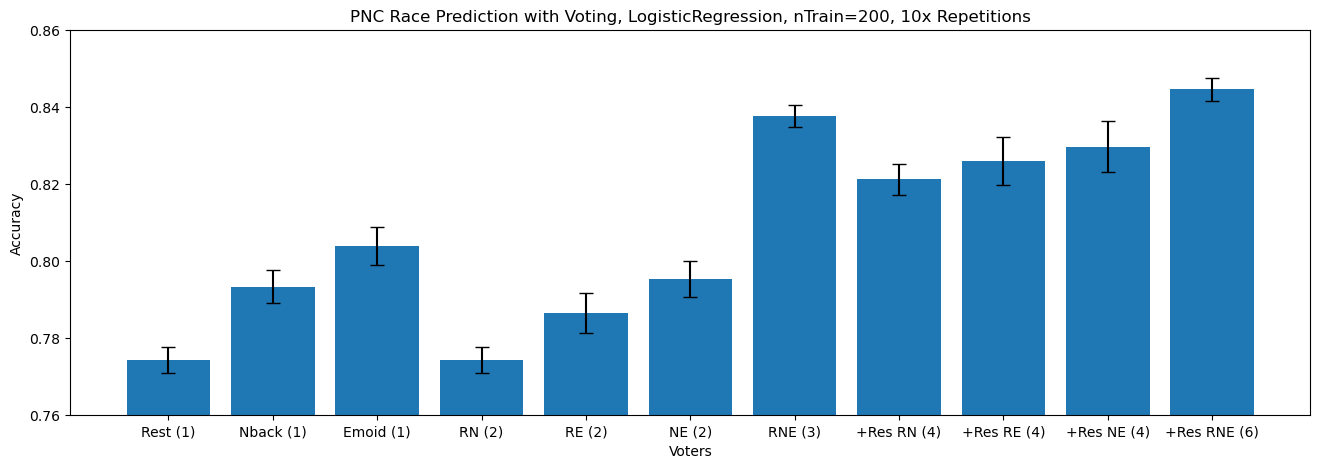

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16,5))

hs = [0.774219536757301,0.7932527694,0.8038267875,0.7742195368,0.7864048338,
      0.7952668681,0.8376636455,0.8211480363,0.8258811682,0.8296072508,0.8445115811]
errs = [0.003482119768,0.004329258168,0.00490558121,0.00335454773,0.005186939607,
        0.004584121363,0.002835697893,0.004065786352,0.006179132019,0.006611645177,0.002954793299]

ax.set_title('PNC Race Prediction with Voting, LogisticRegression, nTrain=200, 10x Repetitions')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Voters')
ax.set_ylim([0.76,0.86])
ax.bar(np.arange(len(hs)), hs, yerr=errs,capsize=5)
ax.set_xticks(np.arange(len(hs)))
ax.set_xticklabels(['Rest (1)', 'Nback (1)', 'Emoid (1)', 'RN (2)', 'RE (2)', 'NE (2)', 'RNE (3)', '+Res RN (4)', '+Res RE (4)', '+Res NE (4)', '+Res RNE (6)']) 

fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/voting-pnc.pdf')